# Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

# VARIABLE DESCRIPTIONS

Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival Survival (0 = No; 1 = Yes)

name Name

sex Sex

age Age

sibsp Number of Siblings/Spouses Aboard

parch Number of Parents/Children Aboard

ticket Ticket Number

fare Passenger Fare (British pound)

cabin Cabin

embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

boat Lifeboat

body Body Identification Number

home.dest Home/Destination

In [3]:
# import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score

In [210]:
import pandas as pd
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA 

In [40]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Correcting.

Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.

Cabin feature may be dropped as it is highly incomplete or contains many null values in training dataset.

PassengerId may be dropped from training dataset as it does not contribute to survival.

Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

In [212]:
df.drop(['Ticket','Name','PassengerId','Cabin'],axis=1,inplace=True)

In [213]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [214]:
df.shape

(891, 8)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [216]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<AxesSubplot:>

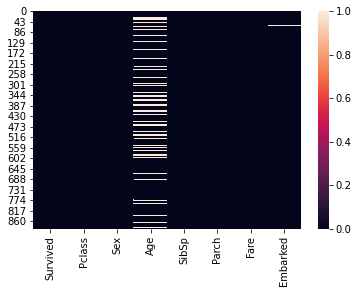

In [217]:
import seaborn as sns
sns.heatmap(df.isnull(),color='red')

from above we clearly see that Age feature Column as many missing values and few are in Embarked

# Missing Values

In [48]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [49]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Label Encode the Columns

In [218]:
from sklearn.preprocessing import LabelEncoder

In [219]:
le=LabelEncoder()

In [220]:
# Encode labels in column 'Sex'.
df['Sex']= le.fit_transform(df['Sex'])
 

In [221]:
# Encode labels in column 'Embarked'.
df['Embarked']= le.fit_transform(df['Embarked'])
 

In [222]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [224]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [225]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


# Distribution plot  
lets plot distribution plots of feature columns



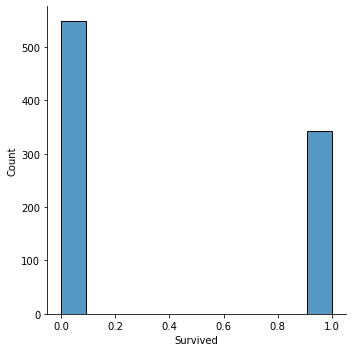

In [226]:
sns.displot(df['Survived'])

from above observation:

    1. Survived class is less then death class.
    2. Data is not normally distributed

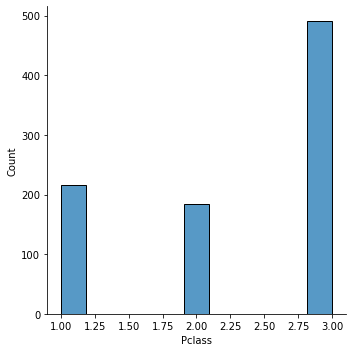

In [227]:
sns.displot(df['Pclass'])

from above observation:
    
    1. Economy class passengers  are more on the ship that 1st class.
    2. Data is not normally distributed

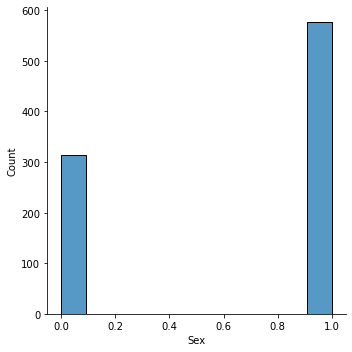

In [83]:
sns.displot(df['Sex'])

from above observation:
    
    1. Male passengers are more then female passengers.
    2. Data is not normally distributed

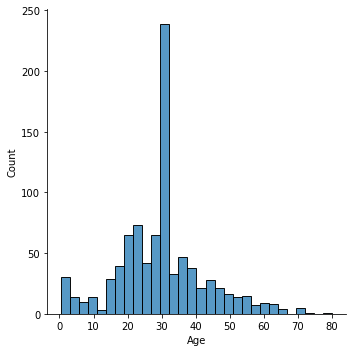

In [84]:
sns.displot(df['Age'])

from above observation:
    
    1. 20 to 50 age passengers are more.
    2. Data is not normally distributed.

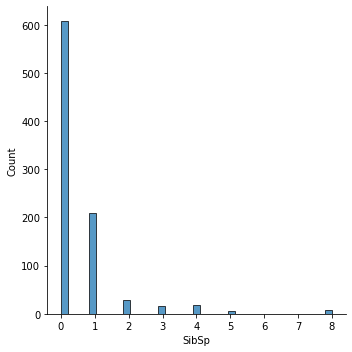

In [86]:
sns.displot(df['SibSp'])

from above observation:
    
    1. There is not much siblings are on the ship.
    2. Data is not normally distributed.

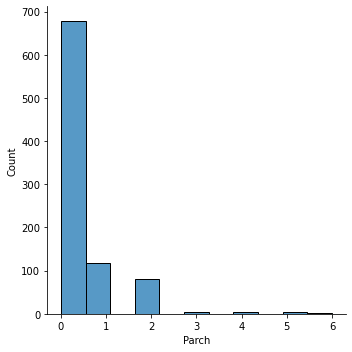

In [87]:
sns.displot(df['Parch'])

from above observation:
    
    1. parents and childrens are not much on the ship.
    2. Data is not normally distributed.

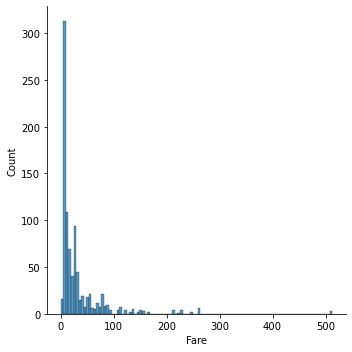

In [88]:
sns.displot(df['Fare'])

from above observation:
    
    1. most fare is under 20,which means less fair passengers are more on the ship
    2. Data is not normally distributed.

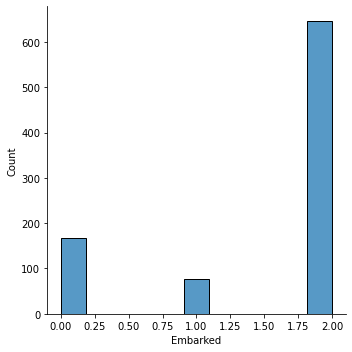

In [89]:
sns.displot(df['Embarked'])

embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
c=0
q=1
s=2
from above observation:
    
    1. passengers are more from Southampton.
    2. Data is not normally distributed.

# EDA on survived and Pclass of passengers

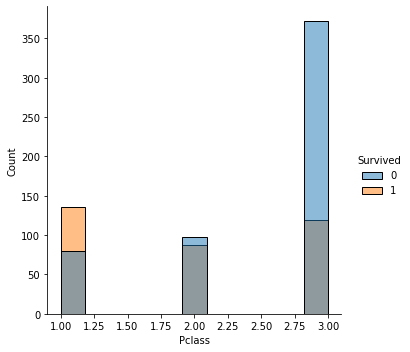

In [81]:
sns.displot(data=df, x='Pclass', hue='Survived')

from above observation:
    
    1. No diffrences in the Titanic too, First class Survival rate is far more better than the 3rd class
    2. No doubt Rich peope having better Survival rate than the poor



# EDA on survived and Sex of passengers

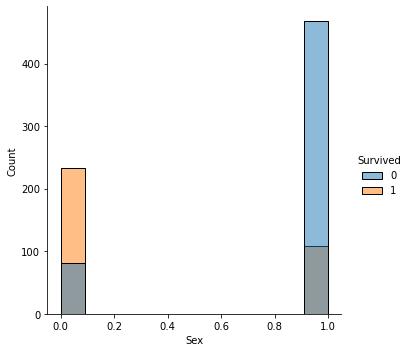

In [99]:
sns.displot(data=df, x='Sex', hue='Survived')

from above observation:
    
    1. Clearly observe that 1 type passengers are survived more then 0 type.
    2. In the all the class female Survival rate is better than Men.



# EDA on survived and Age of passengers

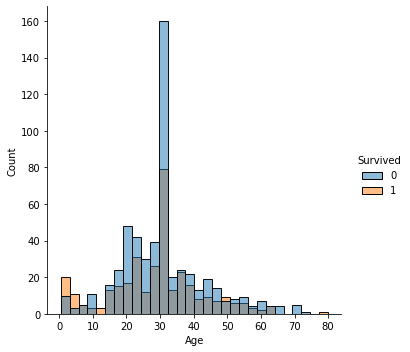

In [100]:
sns.displot(data=df, x='Age', hue='Survived')

from above observation:
    
    1. Childrens are survived more.
    2. middle age passengers are not survived much.



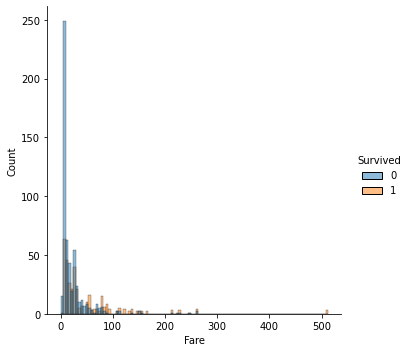

In [101]:
sns.displot(data=df, x='Fare', hue='Survived')

from above observation:
    
    1. survival rate is more in high fare tickets.
    2. rich class passengers are survived more on titanic.



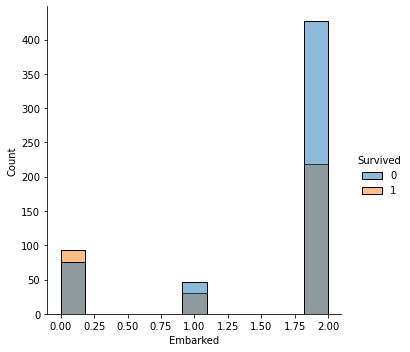

In [104]:
sns.displot(data=df, x='Embarked', hue='Survived')

embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
c=0
q=1
s=2
from above observation:
    
    1. Queenstown passengers are more survival rate then any other embarked place.

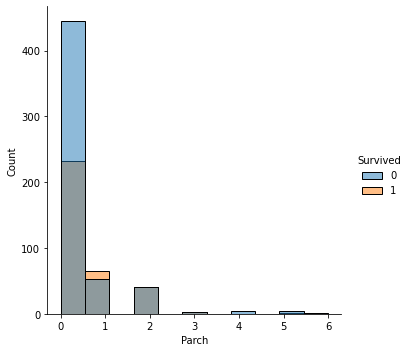

In [105]:
sns.displot(data=df, x='Parch', hue='Survived')

from above observation:
    
    1. big family survival rate is worst .
    2. Small family or single persons survived more.

# Correlation:

In [106]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


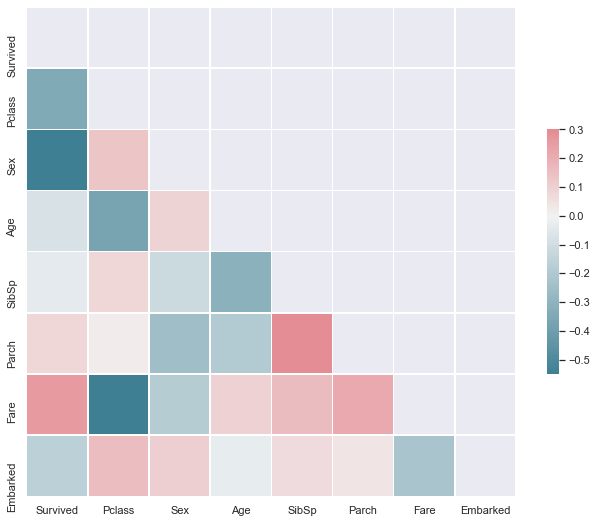

In [231]:
correlations = df.corr()
sns.set(style='dark')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<AxesSubplot:>

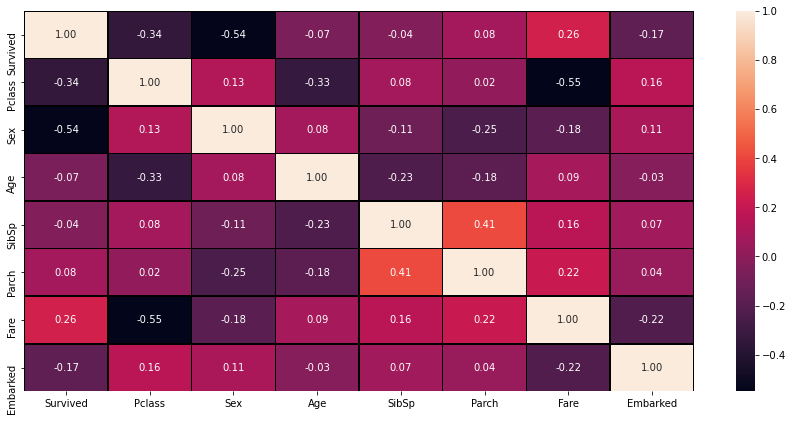

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

Correlation: From the above result it is clear that some columns making positive correlation and some making negative correlation.

positive correlation columns are:

1.Parch
2.Fare


Negative correlation columns are:

1.Pclass
2. Sex
3.Age
4.Sibsp
5.Embarked

The positively correlated columns has a great impact on the target column while the negative correlated has less or zero impact on the target column.

# Describe Heatmap

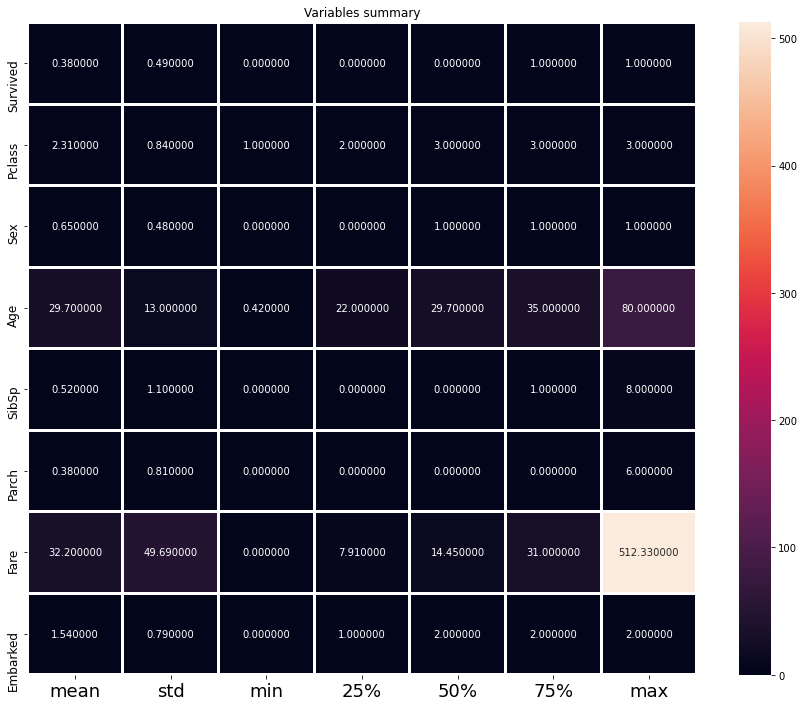

In [108]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()


# Discription of dataset

In [109]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


# Now use subplot and displot to check data are normalised or not.

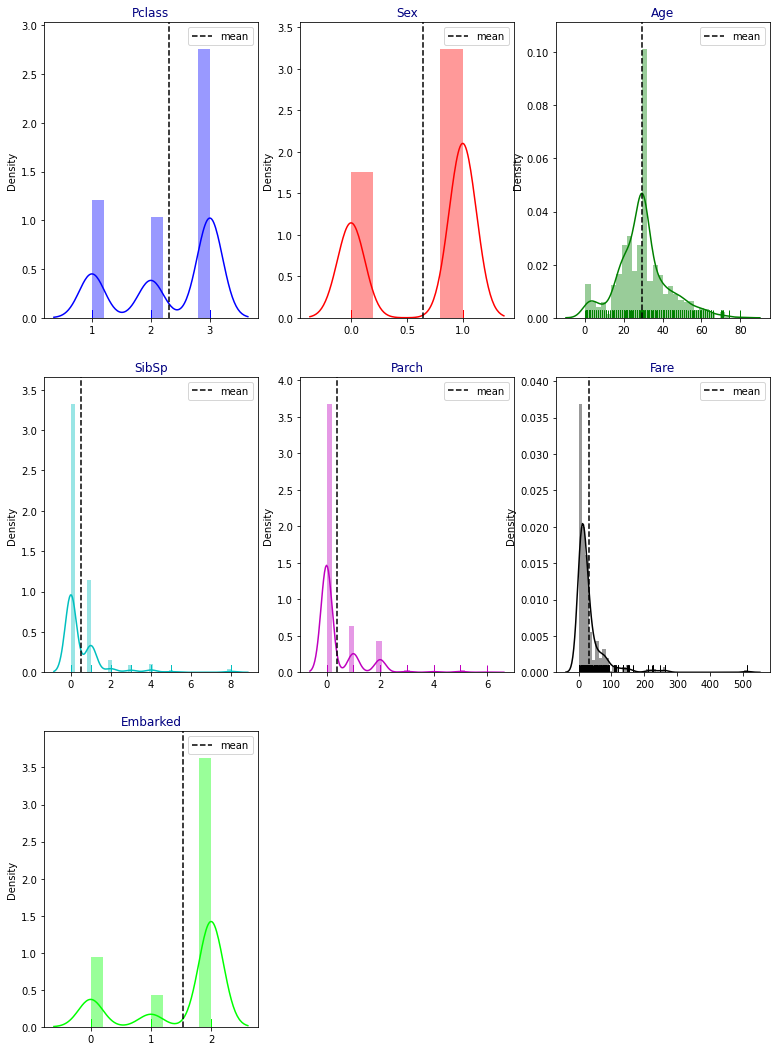

In [113]:
import itertools

cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,3,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observation:
    
As building blocks are out of the normal distribution curve;hence outliers are present and we do data cleaning as well.

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Embarked'}>, <AxesSubplot:>]],
      dtype=object)

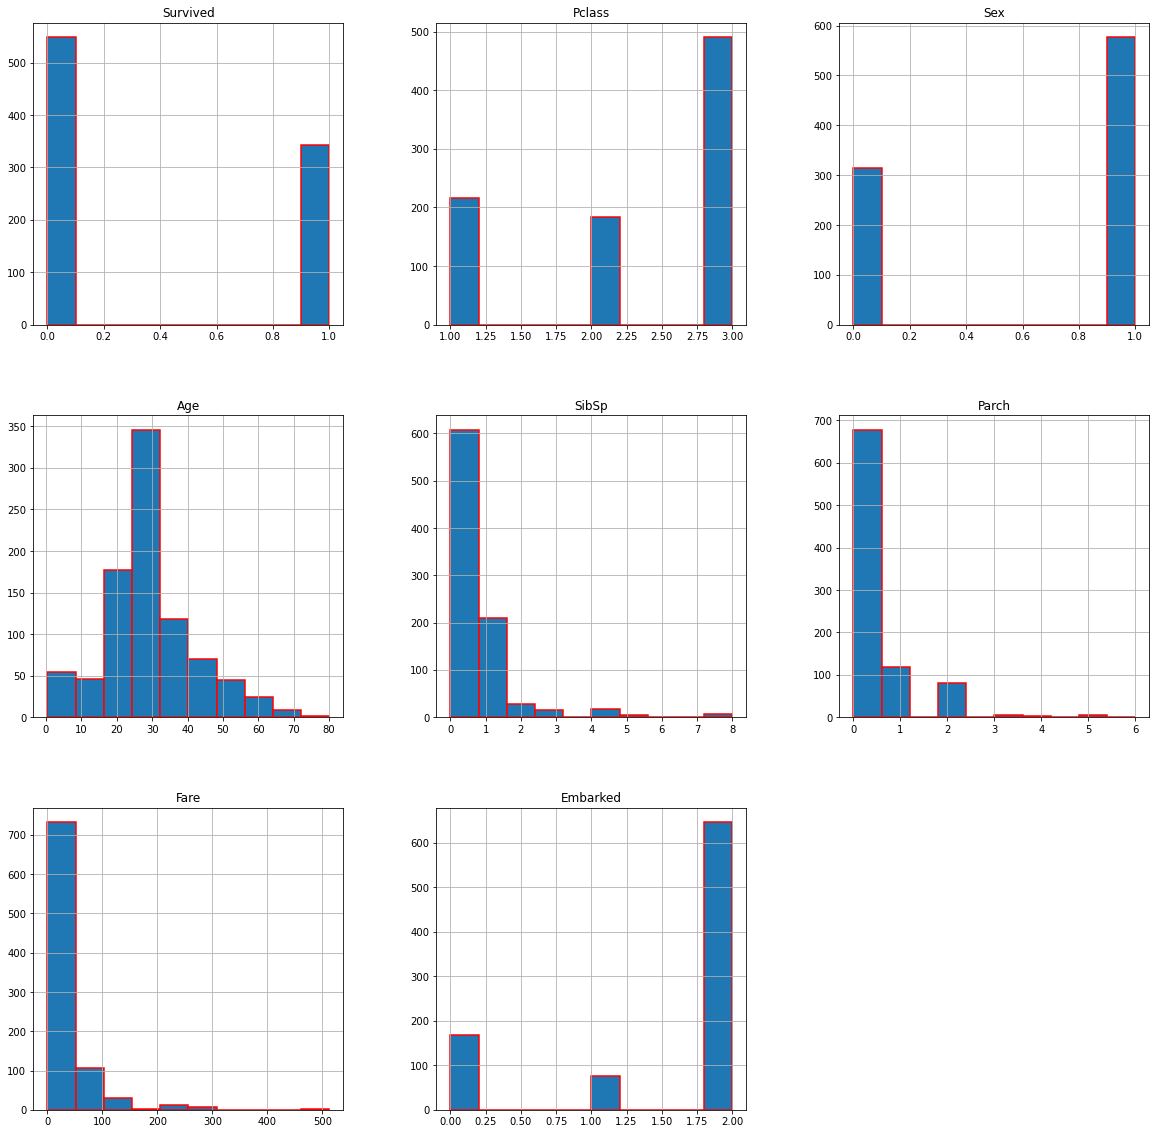

In [114]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

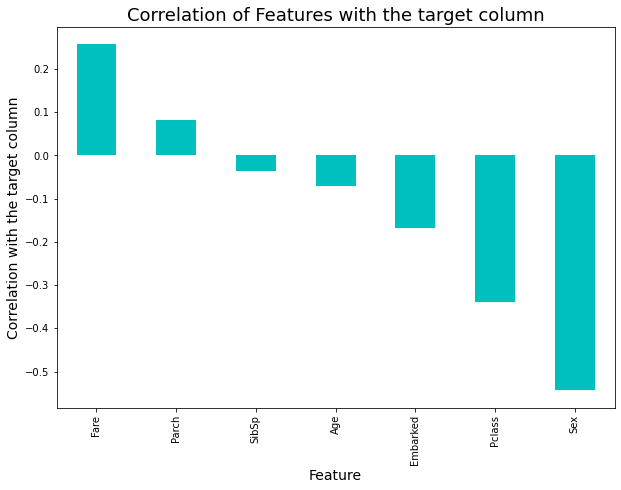

In [116]:
plt.figure(figsize=(10,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()


In [117]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

some columns having skewness

# Detecting outliers 

<AxesSubplot:>

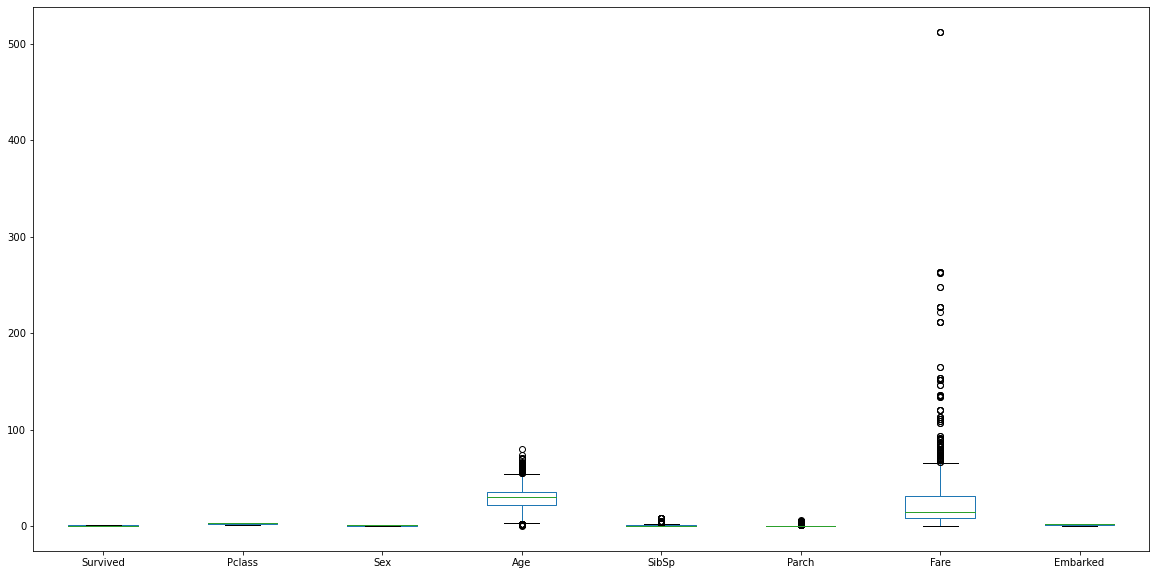

In [118]:
df.plot.box(figsize=(20,10))

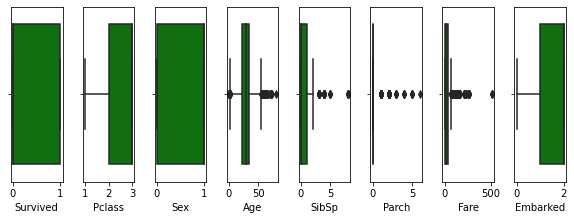

In [119]:
collist=df.columns.values
ncol=30
nrows=30
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+5)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


From above ploting we can find that there is outliers are present in some columns.
Fare having maximum no of outliers.

# Check the percentage of data falls under outliers:

In [121]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
        5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5], dtype=int64))

In [122]:
df_new=df[(z<3).all(axis=1)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [125]:
percentage_loss=((891-820)/891)*100
print(percentage_loss)

7.968574635241302


 The data loss is below 10 percentile so we can proceed futher data cleaning.

In [127]:
df_new.shape

(820, 8)

In [132]:
x=df_new.iloc[:,1:]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [129]:
x.shape

(820, 7)

In [133]:
y=df_new.iloc[:,-8]

In [134]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

# Removing skewness by transforming data.

In [135]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.87283049,  0.72203588, -0.61846778, ..., -0.48469263,
        -0.83470177,  0.60778719],
       [-1.47067587, -1.38497273,  0.68588353, ..., -0.48469263,
         1.55364494, -1.78767552],
       [ 0.87283049, -1.38497273, -0.28381447, ..., -0.48469263,
        -0.74331399,  0.60778719],
       ...,
       [ 0.87283049, -1.38497273,  0.0200539 , ...,  2.08665417,
         0.39490799,  0.60778719],
       [-1.47067587,  0.72203588, -0.28381447, ..., -0.48469263,
         0.65432009, -1.78767552],
       [ 0.87283049,  0.72203588,  0.20668289, ..., -0.48469263,
        -0.76629016, -1.24967343]])

In [136]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.87283049,  0.72203588, -0.61846778, ..., -0.48469263,
        -0.83470177,  0.60778719],
       [-1.47067587, -1.38497273,  0.68588353, ..., -0.48469263,
         1.55364494, -1.78767552],
       [ 0.87283049, -1.38497273, -0.28381447, ..., -0.48469263,
        -0.74331399,  0.60778719],
       ...,
       [ 0.87283049, -1.38497273,  0.0200539 , ...,  2.08665417,
         0.39490799,  0.60778719],
       [-1.47067587,  0.72203588, -0.28381447, ..., -0.48469263,
         0.65432009, -1.78767552],
       [ 0.87283049,  0.72203588,  0.20668289, ..., -0.48469263,
        -0.76629016, -1.24967343]])

# Since the column has binary variable we will use logistic classification model

# Regressor Model Building:
Logistic Regression:

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [138]:
from imblearn.over_sampling import SMOTE

In [139]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [140]:
import numpy as np
np.bincount(y)

array([500, 320], dtype=int64)

In [141]:
y_train.value_counts()

1    500
0    500
Name: Survived, dtype: int64

In [142]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test,pred_test)*100)

At random state 114  The model performs very well
At random_state:- 114
Training accuracy_score is:- 79.26829268292683
Testing accuracy_score is:- 79.26829268292683
At random state 119  The model performs very well
At random_state:- 119
Training accuracy_score is:- 79.26829268292683
Testing accuracy_score is:- 79.26829268292683
At random state 125  The model performs very well
At random_state:- 125
Training accuracy_score is:- 79.26829268292683
Testing accuracy_score is:- 79.26829268292683
At random state 177  The model performs very well
At random_state:- 177
Training accuracy_score is:- 79.8780487804878
Testing accuracy_score is:- 79.8780487804878
At random state 301  The model performs very well
At random_state:- 301
Training accuracy_score is:- 79.26829268292683
Testing accuracy_score is:- 79.26829268292683
At random state 313  The model performs very well
At random_state:- 313
Training accuracy_score is:- 79.26829268292683
Testing accuracy_score is:- 79.26829268292683
At random st

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=980,test_size=0.20)

In [205]:
x_train.shape

(656, 7)

In [206]:
y_train.shape

(656,)

In [207]:
x_test.shape

(164, 7)

In [208]:
y_test.shape

(164,)

In [144]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,test_size=0.20)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_test=lr.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_test)

0.8353658536585366

In [145]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_test))
print('Mean Squared Error:',mean_squared_error(y_test,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_test)))


Error:
Mean Absolute Error: 0.16463414634146342
Mean Squared Error: 0.16463414634146342
Root Mean Square Error: 0.40575133560034454


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       100
           1       0.79      0.78      0.79        64

    accuracy                           0.84       164
   macro avg       0.83      0.83      0.83       164
weighted avg       0.83      0.84      0.84       164



In [156]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lrs=accuracy_score (y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-", j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lrs*100)
    print("\n")

At cv:- 2
Cross validation score is :- 78.90243902439025
accuracy_score is :- 83.53658536585365


At cv:- 3
Cross validation score is :- 79.14672513212659
accuracy_score is :- 83.53658536585365


At cv:- 4
Cross validation score is :- 79.14634146341464
accuracy_score is :- 83.53658536585365


At cv:- 5
Cross validation score is :- 79.14634146341463
accuracy_score is :- 83.53658536585365


At cv:- 6
Cross validation score is :- 78.78202375840849
accuracy_score is :- 83.53658536585365


At cv:- 7
Cross validation score is :- 79.2688479129157
accuracy_score is :- 83.53658536585365


At cv:- 8
Cross validation score is :- 79.5128973919665
accuracy_score is :- 83.53658536585365


At cv:- 9
Cross validation score is :- 79.14609545044327
accuracy_score is :- 83.53658536585365




In [157]:
lrscore=cross_val_score(lr,x,y,cv=8)
print("Cross validation score is :-",lsc*100)
print("accuracy_score is :-",lrs*100)

Cross validation score is :- 79.14609545044327
accuracy_score is :- 83.53658536585365


In [158]:
lrs*100

83.53658536585365

In [159]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[87 13]
 [14 50]]
0.8353658536585366
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       100
           1       0.79      0.78      0.79        64

    accuracy                           0.84       164
   macro avg       0.83      0.83      0.83       164
weighted avg       0.83      0.84      0.84       164



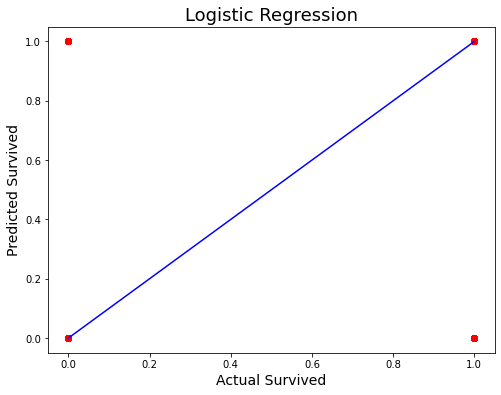

In [160]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Survived',fontsize=14)
plt.ylabel('Predicted Survived',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# Regurlarization

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [163]:
from sklearn.linear_model import RidgeClassifier

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = RidgeClassifier()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [164]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

rd = RidgeClassifier(alpha=0.0001, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd = rd.predict(x_test)

rds = r2_score(y_test,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x,y,cv=8)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 28.249999999999986
Cross Val Score: 79.39034837235866


In [165]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean Absolute Error: 0.17073170731707318
Mean Squared Error: 0.17073170731707318
Root Mean Square Error: 0.4131969352706687


In [166]:
print(accuracy_score(y_test,pred_rd))
print(confusion_matrix(y_test,pred_rd))
print(classification_report(y_test,pred_rd))

0.8292682926829268
[[88 12]
 [16 48]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       100
           1       0.80      0.75      0.77        64

    accuracy                           0.83       164
   macro avg       0.82      0.81      0.82       164
weighted avg       0.83      0.83      0.83       164



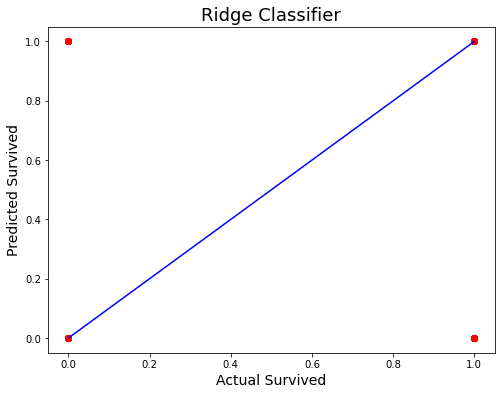

In [168]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Survived',fontsize=14)
plt.ylabel('Predicted Survived',fontsize=14)
plt.title('Ridge Classifier',fontsize=18)
plt.show()

# Ensemble Techniques:

# DecisionTreeClassifier

In [169]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'],'max_features':['auto', 'sqrt', 'log2']}
dt =DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}


In [170]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best',max_features = 'sqrt')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision = dt.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=38)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 7.749999999999979
Cross Val Score: 77.10184552289817


In [171]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_decision)))


Error:
Mean Absolute Error: 0.21951219512195122
Mean Squared Error: 0.21951219512195122
Root Mean Square Error: 0.4685212856658182


In [172]:
print(accuracy_score(y_test,pred_decision))
print(confusion_matrix(y_test,pred_decision))
print(classification_report(y_test,pred_decision))

0.7804878048780488
[[79 21]
 [15 49]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       100
           1       0.70      0.77      0.73        64

    accuracy                           0.78       164
   macro avg       0.77      0.78      0.77       164
weighted avg       0.79      0.78      0.78       164



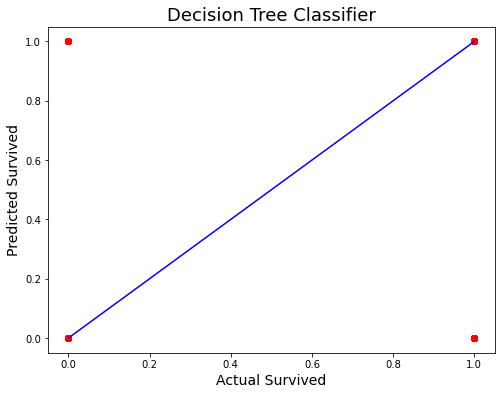

In [173]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_decision, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Survived',fontsize=14)
plt.ylabel('Predicted Survived',fontsize=14)
plt.title('Decision Tree Classifier',fontsize=18)
plt.show()

# Random Forest Classifier

In [174]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'criterion':['gini', 'entropy'],'n_estimators':[100,200,300],'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 300}


In [175]:
rf = RandomForestClassifier(criterion='gini',n_estimators=300,max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_random = rf.predict(x_test)

rfs = r2_score(y_test,pred_random)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=2)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

R2 Score: 33.374999999999986
Cross Val Score: 76.82926829268293


In [176]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_decision)))


Error:
Mean Absolute Error: 0.21951219512195122
Mean Squared Error: 0.21951219512195122
Root Mean Square Error: 0.4685212856658182


In [177]:
print(accuracy_score(y_test,pred_random))
print(confusion_matrix(y_test,pred_random))
print(classification_report(y_test,pred_random))

0.8414634146341463
[[85 15]
 [11 53]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       100
           1       0.78      0.83      0.80        64

    accuracy                           0.84       164
   macro avg       0.83      0.84      0.84       164
weighted avg       0.84      0.84      0.84       164



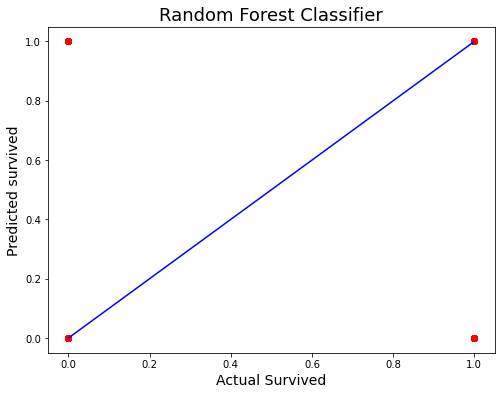

In [185]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_random, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Survived',fontsize=14)
plt.ylabel('Predicted survived',fontsize=14)
plt.title('Random Forest Classifier',fontsize=18)
plt.show()

# Support Vector Classifier

In [186]:
from sklearn.svm import SVC


parameters = {'kernel':['linear', 'poly', 'rbf'],'gamma':['scale', 'auto'],'cache_size':[50,100,200,300] }
sc = SVC()
clf = GridSearchCV(sc,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'cache_size': 50, 'gamma': 'scale', 'kernel': 'poly'}


In [187]:
sv = SVC(kernel='poly',gamma='scale',cache_size=50)
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_support = sv.predict(x_test)

svs = r2_score(y_test,pred_support)
print('R2 Score:',rfs*100)

svscore = cross_val_score(sv,x,y,cv=2)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 33.374999999999986
Cross Val Score: 79.51219512195122


In [188]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_support))
print('Mean Squared Error:',mean_squared_error(y_test,pred_support))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_support)))


Error:
Mean Absolute Error: 0.17073170731707318
Mean Squared Error: 0.17073170731707318
Root Mean Square Error: 0.4131969352706687


In [189]:
print(accuracy_score(y_test,pred_support))
print(confusion_matrix(y_test,pred_support))
print(classification_report(y_test,pred_support))

0.8292682926829268
[[93  7]
 [21 43]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       100
           1       0.86      0.67      0.75        64

    accuracy                           0.83       164
   macro avg       0.84      0.80      0.81       164
weighted avg       0.83      0.83      0.82       164



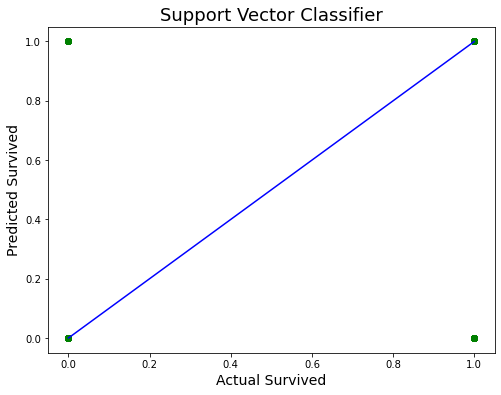

In [190]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_support, color='g')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Survived',fontsize=14)
plt.ylabel('Predicted Survived',fontsize=14)
plt.title('Support Vector Classifier',fontsize=18)
plt.show()

# KNeighborsClassifier

In [191]:
from sklearn.neighbors import KNeighborsClassifier

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsClassifier()
clf = GridSearchCV(kn,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'}


In [192]:
kn = KNeighborsClassifier(algorithm = 'auto', weights = 'uniform',n_neighbors=15)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
pred_k = kn.predict(x_test)

kns = r2_score(y_test,pred_k)
print('R2 Score:',kns*100)

knscore = cross_val_score(kn,x,y,cv=5)
kvc = knscore.mean() 
print('Cross Val Score:',kvc*2)

R2 Score: 23.124999999999986
Cross Val Score: 1.6048780487804877


In [193]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_k))
print('Mean Squared Error:',mean_squared_error(y_test,pred_k))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_k)))


Error:
Mean Absolute Error: 0.18292682926829268
Mean Squared Error: 0.18292682926829268
Root Mean Square Error: 0.42769946138415077


In [194]:
print(accuracy_score(y_test,pred_k))
print(confusion_matrix(y_test,pred_k))
print(classification_report(y_test,pred_k))

0.8170731707317073
[[88 12]
 [18 46]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       100
           1       0.79      0.72      0.75        64

    accuracy                           0.82       164
   macro avg       0.81      0.80      0.80       164
weighted avg       0.82      0.82      0.82       164



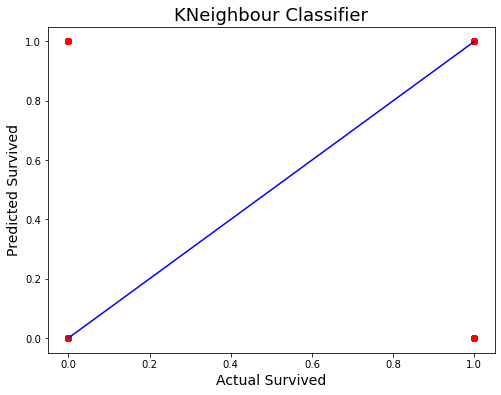

In [196]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_k, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Survived',fontsize=14)
plt.ylabel('Predicted Survived',fontsize=14)
plt.title('KNeighbour Classifier',fontsize=18)
plt.show()


We tested 5 models out of which Logistic Regression performing Best as Accuracy score and CV is Optimum.

# The best model is Logistic Regression.

In [199]:
import pickle
filename = 'titanic_survival.pkl'
pickle.dump(lr, open(filename, 'wb'))

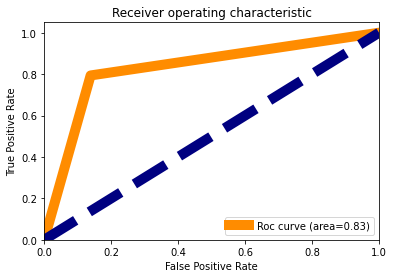

In [201]:
from sklearn.metrics import roc_curve,auc
    
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion:

In [202]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'Original':a,"Predicted":predicted}, index= range(len(a)))
df_com

,Original,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
159,1,1
160,1,1
161,1,1
162,0,1


In [204]:
df_com.sample(10)

,Original,Predicted
74,0,0
17,1,1
145,0,1
39,0,0
67,0,0
21,0,0
40,0,0
80,1,0
134,0,0
120,0,0


# Our model performs at 83% Accuracy